# Inverse problem

Given a series of measurements of relative offsets between transitions, can one uncover (to reasonable accuracy) the generating function of the offsets.

In [4]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
# %load_ext autoreload
# the "1" means: always reload modules marked with "%aimport"
# %autoreload 1

from __future__ import absolute_import, division, print_function
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.pyplot import GridSpec
import seaborn as sns
import mpld3
import numpy as np
import pandas as pd
import os, sys
import warnings

In [3]:
def generate_distortion(wavelength, amplitude=300.0, omega=50.0):
    return amplitude * np.sin(wavelength / omega)

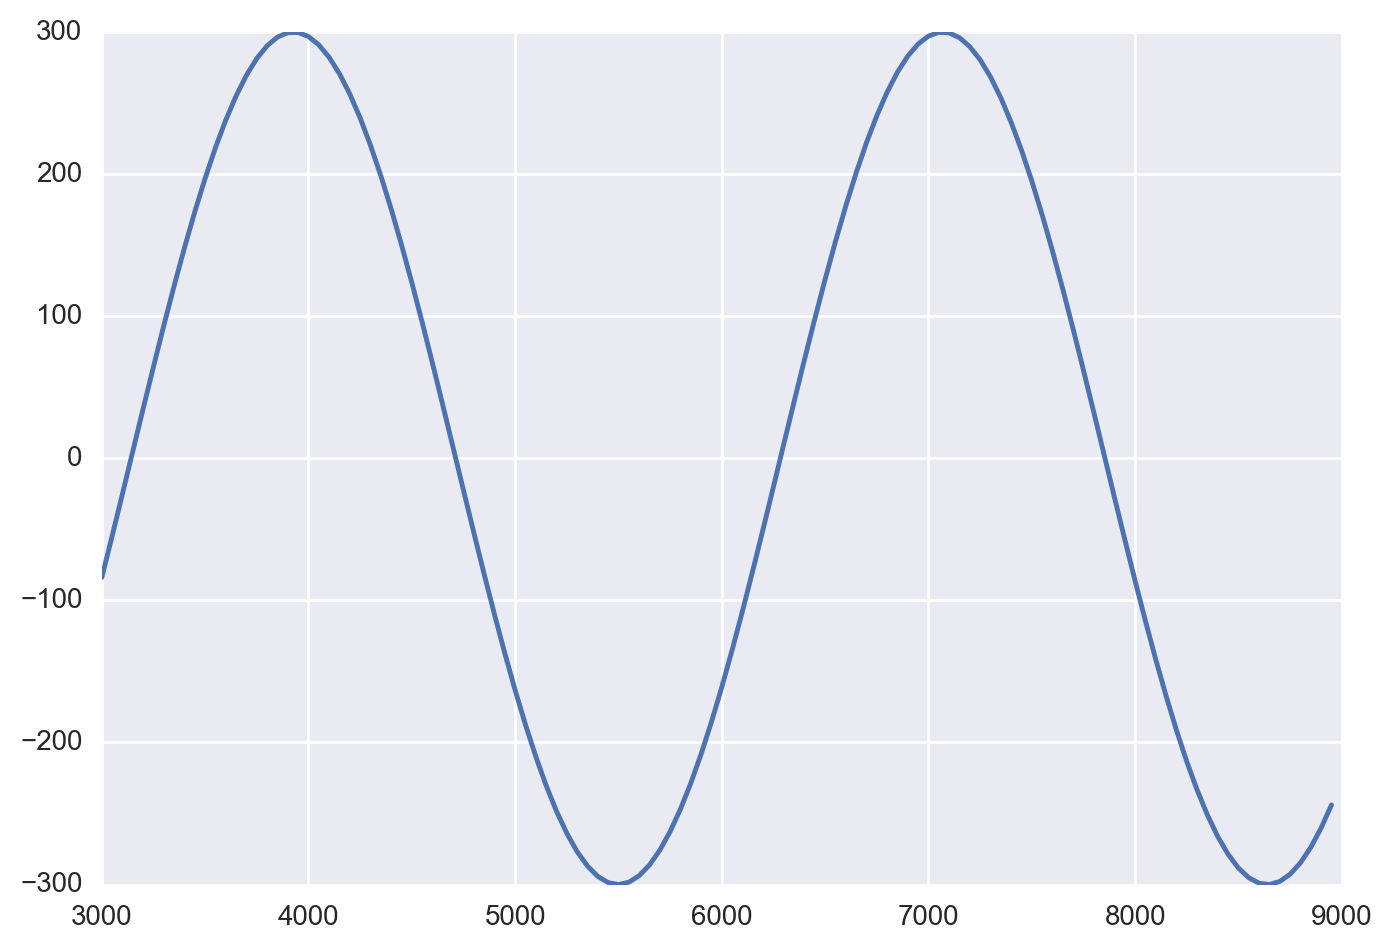

In [5]:
x = np.arange(3000, 9000, 50)
y = generate_distortion(x, omega=500)
plt.plot(x, y)

In [37]:
def n_components(high=10):
    return np.random.randint(3, high)

def xvals(n_components):
    return 6000 * np.random.rand(n_components) + 3000.0

def yvals(xvals):
    return generate_distortion(xvals, omega=500)

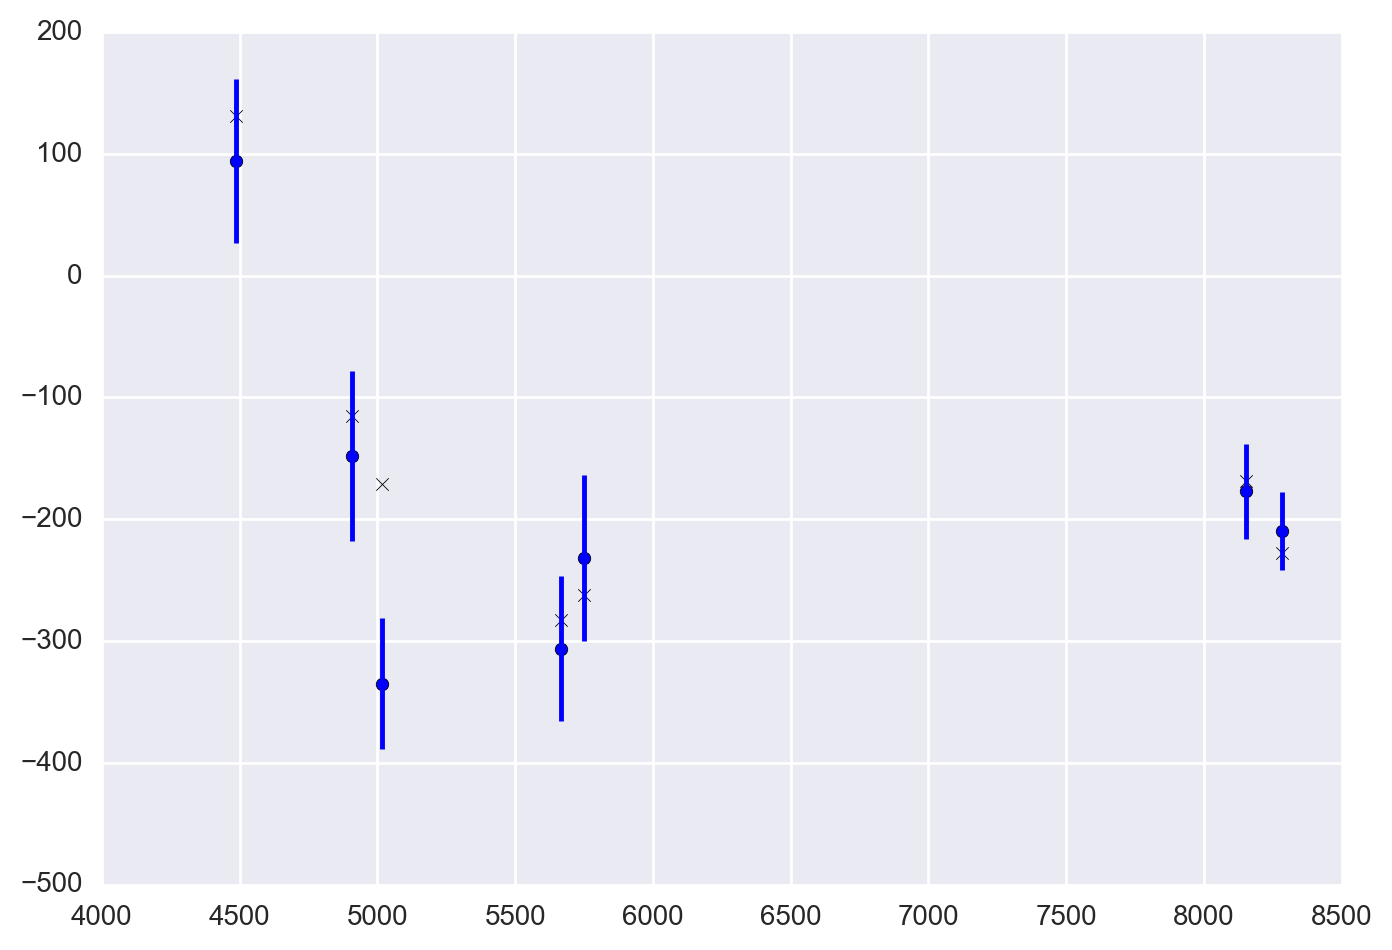

In [40]:
ns = n_components()
xs = xvals(ns)
ys = yvals(xs)

ysigmas = np.random.rand(ns) * 50.0 + 20 

y_measurement = np.random.randn(ns) * ysigmas + ys

plt.scatter(xs, ys, c='k', marker='x')
for (xplot, yplot, eplot) in zip(xs, y_measurement, ysigmas):
    plt.errorbar(xplot, yplot, eplot, c='b')
    plt.scatter(xplot, yplot, c='b');
    
# x = np.arange(3000, 9000, 50)
# y = generate_distortion(x, omega=500)
# plt.plot(x, y)

In [43]:
from itertools import combinations, islice, takewhile


In [94]:
df = pd.DataFrame(columns=['system', 'wavelength', 'vshift', 'sigma'])
n_systems = 100
names = [''.join(x) for x in islice(combinations('abcdefghijklmnopqrstuvwxyz', 2), n_systems)]
count = 0
abs_count = 0
for _ in range(n_systems):
    name = names[count]
    count += 1
    ns = n_components()
    xs = xvals(ns)
    ys = yvals(xs)
    ysigmas = np.random.rand(ns) * 50.0 + 20 
    y_measurement = np.random.randn(ns) * ysigmas + ys
    index = np.argsort(xs)
    xs = xs[index]
    y_measurement = y_measurement[index]
    ysigmas = ysigmas[index]
    for single in range(ns):
        abs_count += 1
        df.loc[abs_count] = [name, 
                                  xs[single], 
                                  y_measurement[single] - y_measurement[0],
                                  ysigmas[single]]


In [95]:
df = df.sort_index()

In [96]:
df.head(20)

,system,wavelength,vshift,sigma
1,ab,4549.236903,0.000000,59.008592
2,ab,4756.800072,-86.972270,43.054956
3,ab,5163.751758,-352.502894,47.038892
4,ab,5477.852496,-414.517842,45.596023
5,ab,5744.199249,-360.584321,20.807685
6,ab,6411.708406,-48.267200,33.950484
7,ab,8281.387580,-302.348793,23.920721
8,ac,3973.903025,0.000000,51.611091
9,ac,5046.913918,-493.245332,25.256193
10,ac,5244.267812,-652.445345,59.108030


In [ ]:
pd.cut()